In [2]:
# Importer la bibliothèque pandas avec l'alias pd
import pandas as pd

In [4]:
# Load the dataset :
df = pd.read_csv('Data/athlete_events.csv')
df.head(3)


In [5]:
# determine the size of the  DataFrame (number of rows and columns ) : 
df.shape

(271116, 15)

In [6]:
#  obtain a concise summary of a DataFrame's structure and content : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
#  display the last 3 rows of a DataFrame :
df.tail(3) 

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [8]:
# check the column names  : 
print(df.columns)

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')


1. which year and city did the Netherlands win the highest number of medals in their history?

In [9]:
#Create a new DataFrame that includes only the rows where the team is "Netherlands" and the medal is not "NA."
netherlands_df = df[(df['team'] == 'Netherlands') & (df['medal'] != 'NA')]
netherlands_df.head(2)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [10]:
#Group the filtered DataFrame by the "year" and "city" columns and count the number of medals won in each year and city.
medal_counts = netherlands_df.groupby(['year', 'city']).size().reset_index(name='medal_count')

# Find the year and city with the highest medal count :
highest_medals = medal_counts.sort_values('medal_count', ascending=False).iloc[0]

#Extract the year and city information: Get the "year" and "city" values from the highest_medals row.
highest_year = highest_medals['year']
highest_city = highest_medals['city']

#Print the results:
print(f"The Netherlands won the highest number of medals in their history in the year {highest_year} in the city of {highest_city}.")


The Netherlands won the highest number of medals in their history in the year 1928 in the city of Amsterdam.


2. Filter the dataset specifically for the United States, Winter season, and the year 1980

In [11]:
df[(df["team"]=="United States") & (df["season"]=="Winter") & (df["year"]==1980)].head(3)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
1691,938,Cary Glen Adgate,M,26.0,173.0,74.0,United States,USA,1980 Winter,1980,Winter,Lake Placid,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
5010,2856,Lisa-Marie Allen,F,19.0,NaN,NaN,United States,USA,1980 Winter,1980,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
6839,3837,Karl Ruben Anderson,M,26.0,173.0,78.0,United States,USA,1980 Winter,1980,Winter,Lake Placid,Alpine Skiing,Alpine Skiing Men's Downhill,NaN


3. Germany's performance in winning gold medals.

In [12]:
df_germany= df[(df["team"]=="Germany")&(df["medal"]=="Gold")]
df_germany.head(2)


,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
1533,849,Filip Kamil Adamski,M,29.0,189.0,87.0,Germany,GER,2012 Summer,2012,Summer,London,Rowing,Rowing Men's Coxed Eights,Gold
1534,850,Herbert Adamski,M,26.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Rowing,Rowing Men's Coxed Pairs,Gold


4. analyzing the medal counts for each team (country) : (top 5)

In [13]:
pivot_country = df.pivot_table(index="team", columns="medal", aggfunc=({"medal":"count"}), fill_value=0)
pivot_country.columns = pivot_country.columns.droplevel(0)
pivot_country = pivot_country.reset_index().rename_axis(None, axis=1)
pivot_country["Total"] = pivot_country.Bronze + pivot_country.Gold + pivot_country.Silver
pc_head = pivot_country.sort_values(by=["Gold","Silver","Bronze"], ascending=[False, False, False]).head()
pc_head

,team,Bronze,Gold,Silver,Total
462,United States,1233,2474,1512,5219
403,Soviet Union,677,1058,716,2451
165,Germany,678,679,627,1984
215,Italy,484,535,508,1527
171,Great Britain,572,519,582,1673


5. analyze performance by country and identify the most successful countries in the history of the Olympic Games

In [14]:
# Filter the DataFrame : include only rows with medals (excluding rows with 'NA' in the 'medal' column) :
medal_df = df[df['medal'] != 'NA']

# Group the filtered DataFrame by the 'team' :
country_medal_counts = medal_df.groupby('team')['medal'].count().reset_index(name='medal_count')

#Sort the country_medal_counts DataFrame in descending order based on the 'medal_count' column to identify the most successful countries.
sorted_countries = country_medal_counts.sort_values('medal_count', ascending=False)

# Print the results : 
num_countries = 5  # Number of top countries to display
top_countries = sorted_countries.head(num_countries)

print(f"Top {num_countries} countries with the highest medal counts:")
for index, row in top_countries.iterrows():
    country = row['team']
    medal_count = row['medal_count']
    print(f"{country}: {medal_count} medals")


Top 5 countries with the highest medal counts:
United States: 5219 medals
Soviet Union: 2451 medals
Germany: 1984 medals
Great Britain: 1673 medals
France: 1550 medals


6. compare the characteristics of medal-winning and non-medal-winning athletes

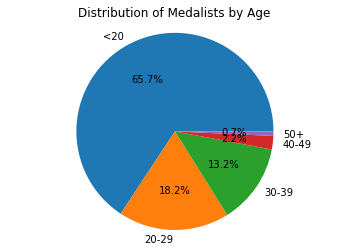

In [16]:
# Filter the DataFrame (DataFrames for medal-winning )
medalists_df = df[df['medal'] != 'NA']

# Ccompare the age distributions between medalists :
import matplotlib.pyplot as plt

age_ranges = ['<20', '20-29', '30-39', '40-49', '50+']
age_counts = pd.cut(medalists_df['age'], bins=[0, 20, 30, 40, 50, float('inf')], labels=age_ranges).value_counts()

plt.pie(age_counts, labels=age_ranges, autopct='%1.1f%%')
plt.title('Distribution of Medalists by Age')
plt.axis('equal')
plt.show()




Based on the provided results, it appears that the age distribution of medalists is as follows:

- Less than 20 years old: 65.7%
- 20-29 years old: 18.2%
- 30-39 years old: 13.2%
- 40-49 years old: 2.2%
- 50 years old and above: 0.7%

younger athletes tend to be more prominent among medal winners, with the majority falling below the age of 20

7. compare medals between genders

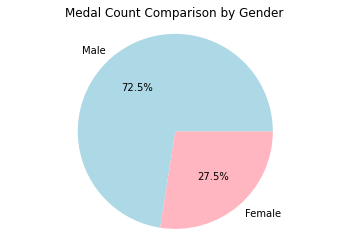

In [20]:
# Filter the DataFrame: Create two separate DataFrames for each gender using the "sex" column 
male_medalists = df[(df['sex'] == 'M') & (df['medal'] != 'NA')]
female_medalists = df[(df['sex'] == 'F') & (df['medal'] != 'NA')]

# Count the total number of medals for each gender:
male_medal_count = male_medalists.shape[0]
female_medal_count = female_medalists.shape[0]

# Compare medals by gender using a chart, such as a bar plot:


# Create a list of labels for the pie chart
labels = ['Male', 'Female']

# Create a list of colors for the pie chart
colors = ['lightblue', 'lightpink']

# Create a list of the total medal counts for each gender
total_medal_counts = [male_medal_count, female_medal_count]

# Plot the pie chart
plt.pie(total_medal_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Medal Count Comparison by Gender')
plt.axis('equal')

# Show the plot
plt.show()




8. Create a plot visualizing the relationship between the number of athletes countries send to an event and the number of medals they receive.

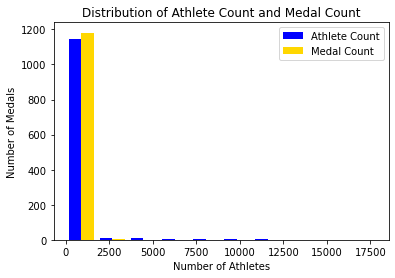

In [21]:
import matplotlib.pyplot as plt

# Group the DataFrame by country and count the number of athletes and medals
country_stats = df.groupby('team').agg({'name': 'count', 'medal': lambda x: x[x != 'NA'].count()}).reset_index()
country_stats.columns = ['Country', 'Athlete Count', 'Medal Count']

# Extract the relevant data for the histogram
athlete_count = country_stats['Athlete Count']
medal_count = country_stats['Medal Count']

# Create the histogram
plt.hist([athlete_count, medal_count], bins=10, color=['blue', 'gold'], label=['Athlete Count', 'Medal Count'])
plt.xlabel('Number of Athletes')
plt.ylabel('Number of Medals')
plt.title('Distribution of Athlete Count and Medal Count')
plt.legend()

# Show the plot
plt.show()


9. In which sports does the height of an athlete increase their chances of earning a medal?


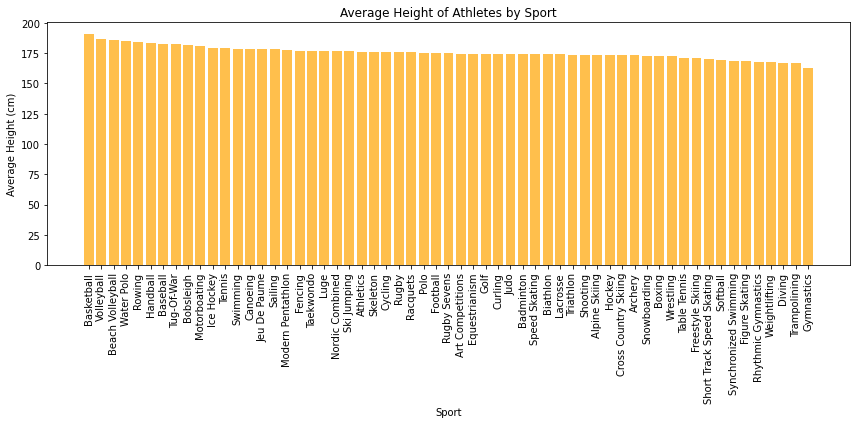

In [22]:
# Filter the DataFrame for athletes with a known height and a medal status
filtered_df = df[(df['height'].notnull()) & (df['medal'] != 'NA')]

# Group the filtered DataFrame by sport and calculate the average height
sport_heights = filtered_df.groupby('sport')['height'].mean().reset_index()

# Sort the DataFrame by average height in descending order
sport_heights = sport_heights.sort_values('height', ascending=False)

# Create a bar plot to compare the average height by sport
plt.figure(figsize=(12, 6))
plt.bar(sport_heights['sport'], sport_heights['height'], color='orange', alpha=0.7)

# Set labels and title
plt.xlabel('Sport')
plt.ylabel('Average Height (cm)')
plt.title('Average Height of Athletes by Sport')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


10. Analysis of Athletes' Performance by Season (Summer vs. Winter)

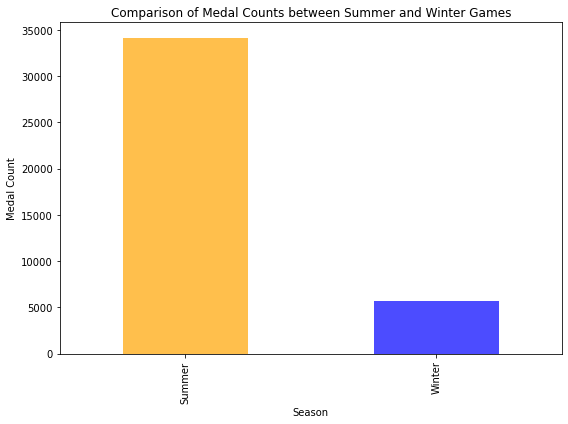

In [23]:


# Filter the DataFrame for athletes with known medal counts and season
filtered_df = df[(df['medal'] != 'NA') & (df['season'].isin(['Summer', 'Winter']))]

# Group the filtered DataFrame by season and calculate the total medal counts
medal_counts = filtered_df.groupby('season')['medal'].count()

# Create a bar plot to compare the medal counts between Summer and Winter Games
plt.figure(figsize=(8, 6))
medal_counts.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Medal Count')
plt.title('Comparison of Medal Counts between Summer and Winter Games')

# Show the plot
plt.tight_layout()
plt.show()


11. analyze athletes' performance by season (Summer vs. Winter) specifically in Canada:

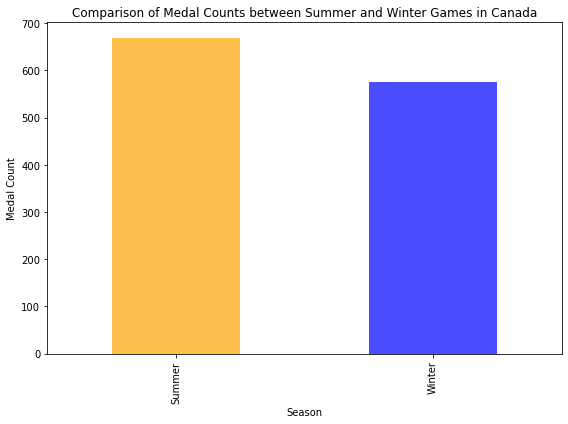

In [24]:


# Filter the DataFrame for athletes representing Canda
china_df = df[df['team'] == 'Canada']

# Filter the China DataFrame for athletes with known medal counts and season
filtered_df = china_df[(china_df['medal'] != 'NA') & (china_df['season'].isin(['Summer', 'Winter']))]

# Group the filtered DataFrame by season and calculate the total medal counts
medal_counts = filtered_df.groupby('season')['medal'].count()

# Create a bar plot to compare the medal counts between Summer and Winter Games in China
plt.figure(figsize=(8, 6))
medal_counts.plot(kind='bar', color=['orange', 'blue'], alpha=0.7)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Medal Count')
plt.title('Comparison of Medal Counts between Summer and Winter Games in Canada')

# Show the plot
plt.tight_layout()
plt.show()


12. Summer and Winter Games Medal Distribution :

In [25]:
# Filter the dataset for France
france_data = df[df["team"] == "France"]

# Group the filtered dataset by "games" and count the number of medals won
medal_counts = france_data.groupby("games")["medal"].count()

# Identify the game with the highest medal count
most_medals_game = medal_counts.idxmax()

# Identify the game with the lowest medal count
least_medals_game = medal_counts.idxmin()

# Print the results
print(f"In France, the game with the most medals won is {most_medals_game}.")
print(f"In France, the game with the fewest medals won is {least_medals_game}.")

In France, the game with the most medals won is 1920 Summer.
In France, the game with the fewest medals won is 1956 Winter.


13. In Egypt, the game they should not play again :

In [26]:

# Filter the dataset for Egypt
egypt_data = df[df["team"] == "Egypt"]

# Group the filtered dataset by "games" and count the number of medals won
medal_counts = egypt_data.groupby("games")["medal"].count()

# Identify the game with the fewest medal counts
fewest_medals_game = medal_counts.idxmin()

# Retrieve the name of the game
game_name = df.loc[df["games"] == fewest_medals_game, "event"].iloc[0]

# Print the result
print(f"In Egypt, the game they should not play again is {game_name}.")


In Egypt, the game they should not play again is Football Men's Football.
